# ナイーブベイズ分類器

ナイーブベイスについては以下を参照してください。
[https://scikit-learn.org/stable/modules/naive_bayes.html](https://scikit-learn.org/stable/modules/naive_bayes.html)

**データとモジュールのロード**

In [1]:
import pandas as pd
from sklearn import model_selection

data = pd.read_csv("input/pn_same_judge_preprocessed.csv")
train, test = model_selection.train_test_split(data, test_size=0.1, random_state=0)

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import PrecisionRecallDisplay

## MultinomialNB

[sklearn.naive_bayes.MultinomialNB](https://scikit-learn.org/stable/modules/naive_bayes.html)
を使います。

In [3]:
from sklearn.naive_bayes import MultinomialNB

In [4]:
pipe_nb = Pipeline([
    ("vect", TfidfVectorizer(tokenizer=str.split)),
    ("clf", MultinomialNB())
])

pipe_nb.fit(train["tokens"], train["label_num"])

Pipeline(steps=[('vect',
                 TfidfVectorizer(tokenizer=<method 'split' of 'str' objects>)),
                ('clf', MultinomialNB())])

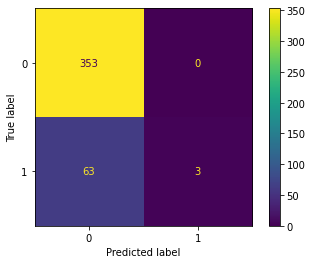

In [5]:
pred_nb = pipe_nb.predict(test["tokens"])
ConfusionMatrixDisplay.from_predictions(y_true=test["label_num"], y_pred=pred_nb)

In [6]:
score_nb = pipe_nb.predict_proba(test["tokens"])[:,1]

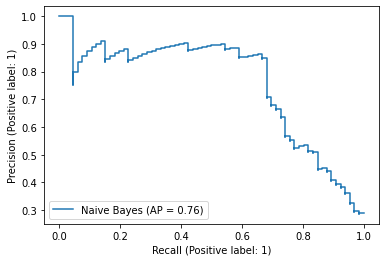

In [7]:
PrecisionRecallDisplay.from_predictions(
    y_true=test["label_num"],
    y_pred=score_nb,
    name="Naive Bayes",
)